In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split

In [17]:
class NadarayaWatsonKernelRegression:
    def __init__(self, kernel='gaussian', bandwidth=1.0):
        self.kernel = kernel
        self.bandwidth = bandwidth

    def _kernel_function(self, distances):
        """Gaussian Kernel function."""
        return np.exp(-0.5 * (distances / self.bandwidth) ** 2, dtype=np.float128)

    def fit(self, X_train, y_train):
        """Fit the model with training data."""
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        """Predict the target values for the test data."""
        distances = cdist(X_test, self.X_train, 'euclidean')  # Compute pairwise distances
        weights = self._kernel_function(distances)  # Apply kernel
        weights_sum = np.sum(weights, axis=1, keepdims=True, dtype=np.float128)  # Normalize weights
        weights /= weights_sum
        return np.dot(weights, self.y_train)  # Weighted sum of target values

/tmp/ipykernel_20629/1986616810.py:20: RuntimeWarning: invalid value encountered in divide
  weights /= weights_sum


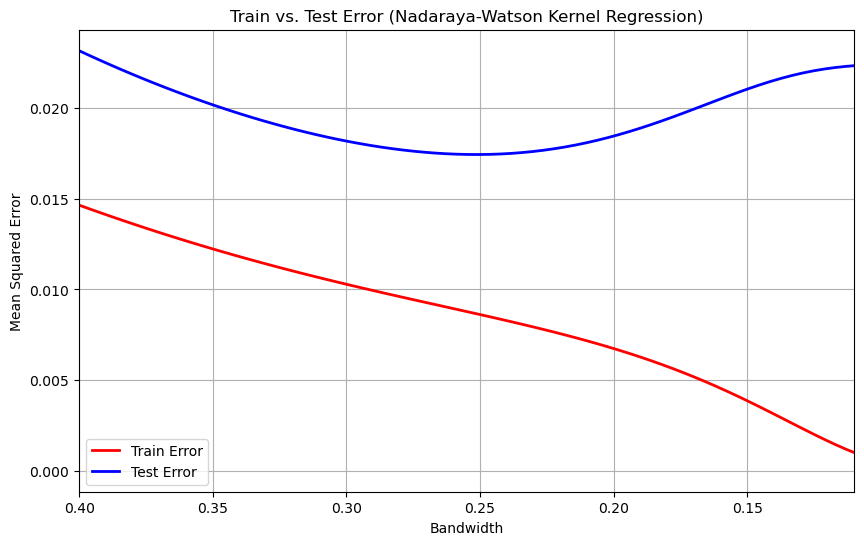

In [18]:
# Generate training data
np.random.seed(1234)
data_x = np.linspace(10, 25, 70, dtype=np.float128)
data_y = np.sin(data_x) + 1e-1 * np.random.randn(70)  # Add slight noise

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# List of bandwidths to evaluate
bandwidths = np.linspace(.4, 0.00001, 100)

train_errors = []
test_errors = []

# Loop over different bandwidths
for bandwidth in bandwidths:
    nwkr = NadarayaWatsonKernelRegression(kernel='gaussian', bandwidth=bandwidth)
    nwkr.fit(X_train, y_train)

    # Calculate training error
    y_train_pred = nwkr.predict(X_train)
    train_error = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_error)

    # Calculate test error
    y_test_pred = nwkr.predict(X_test)
    test_error = mean_squared_error(y_test, y_test_pred)
    test_errors.append(test_error)

# Plot train and test errors
plt.figure(figsize=(10, 6))
plt.plot(bandwidths, train_errors, label='Train Error', color='red', linewidth=2)
plt.plot(bandwidths, test_errors, label='Test Error', color='blue', linewidth=2)

# Labels and title
plt.xlabel('Bandwidth')
plt.ylabel('Mean Squared Error')
plt.title('Train vs. Test Error (Nadaraya-Watson Kernel Regression)')
plt.legend()
plt.grid(True)
plt.xlim(.11,.4)
plt.gca().invert_xaxis()
plt.show()